## Importing the libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle

## Reading the data sets

In [51]:
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')
ratings = pd.read_csv('rating.csv')

In [52]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [54]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [55]:
movies['genres'] = movies['genres'].str.replace('|',' ')

In [56]:
len(movies.movieId.unique())

27278

In [57]:
len(ratings.movieId.unique())

26744

In [58]:
# limit ratings to user ratings that have rated more than 55 movies 
ratings_f = ratings.groupby('userId').filter(lambda x : len(x)>=55 )

In [59]:
movie_list_rating = ratings_f.movieId.unique().tolist()

In [60]:
ratings_f

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [61]:
movie_list_rating

[2,
 29,
 32,
 47,
 50,
 112,
 151,
 223,
 253,
 260,
 293,
 296,
 318,
 337,
 367,
 541,
 589,
 593,
 653,
 919,
 924,
 1009,
 1036,
 1079,
 1080,
 1089,
 1090,
 1097,
 1136,
 1193,
 1196,
 1198,
 1200,
 1201,
 1208,
 1214,
 1215,
 1217,
 1219,
 1222,
 1240,
 1243,
 1246,
 1249,
 1258,
 1259,
 1261,
 1262,
 1266,
 1278,
 1291,
 1304,
 1321,
 1333,
 1348,
 1350,
 1358,
 1370,
 1374,
 1387,
 1525,
 1584,
 1750,
 1848,
 1920,
 1967,
 1994,
 1997,
 2021,
 2100,
 2118,
 2138,
 2140,
 2143,
 2173,
 2174,
 2193,
 2194,
 2253,
 2288,
 2291,
 2542,
 2628,
 2644,
 2648,
 2664,
 2683,
 2692,
 2716,
 2761,
 2762,
 2804,
 2872,
 2918,
 2944,
 2947,
 2959,
 2968,
 3000,
 3030,
 3037,
 3081,
 3153,
 3265,
 3438,
 3476,
 3479,
 3489,
 3499,
 3889,
 3932,
 3996,
 3997,
 4011,
 4027,
 4105,
 4128,
 4133,
 4226,
 4306,
 4446,
 4467,
 4571,
 4720,
 4754,
 4878,
 4896,
 4911,
 4915,
 4941,
 4980,
 4993,
 5026,
 5039,
 5040,
 5146,
 5171,
 5540,
 5679,
 5797,
 5816,
 5898,
 5952,
 5999,
 6093,
 6242,
 6333

In [62]:
# we have kept 97% of the original movie titles in ratings dataframe
len(ratings_f.movieId.unique())/len(movies.movieId.unique())*100

97.85908057775497

In [63]:
# only 57% of the users
len(ratings_f.userId.unique())/len(ratings.userId.unique())*100

57.797867040211415

In [64]:
# filter movie dataframe
movies = movies[movies.movieId.isin(movie_list_rating)]

In [65]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
Mapping_file = dict(zip(movies.title.tolist(),movies.movieId.tolist()))

In [67]:
tags.drop(['timestamp'], 1 , inplace = True)
ratings_f.drop(['timestamp'], 1 ,inplace = True)

# Content based filtering

In [69]:
# merge the movies and the tags dataframe 
mixed = pd.merge(movies, tags, on = 'movieId', how = 'left')
mixed.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Pixar animation
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,TÃ©a Leoni does not star in this movie


In [70]:
# create megadata tag for each movie from tags and genres
mixed.fillna("",inplace = True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies,mixed,on = 'movieId',how = 'left')
Final['metadata'] = Final[['tag','genres']].apply(lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','metadata']].head()
# combined genres and tags

,movieId,title,metadata
0,1,Toy Story (1995),Watched computer animation Disney animated fea...
1,2,Jumanji (1995),time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Diane Keaton family sequel Steve Martin weddin...


In [71]:
Final.shape

(26694, 5)

In [72]:
Final.loc[0,"metadata"]

"Watched computer animation Disney animated feature Pixar animation TÃ©a Leoni does not star in this movie Pixar animation family Tom Hanks Pixar witty Pixar adventure animated animation clever comedy computer animation family fantasy Tom Hanks bright DARING RESCUES fanciful HEROIC MISSION humorous light rousing TOYS COME TO LIFE UNLIKELY FRIENDSHIPS warm witty animation humorous Pixar time travel Pixar Pixar animation animation kids movie Pixar Pixar Pixar witty Disney Tim Allen time travel action figure action figures Buzz Lightyear CG animation toy toys Woody animation Pixar animation Disney villian hurts toys pixar animation disney fantasy Pixar animation pixar children é˜®ä¸€é¸£ animation computer animation funny humorous Pixar Tom Hanks witty 3D Disney funny Pixar time travel Pixar time travel animation Pixar Cartoon Disney toy toys Pixar Pixar animation pixar animated animation comedy Disney Pixar ya boy clever computer animation Disney fantasy Pixar toys witty animation cgi rat

# Creating a content latent matrix from movie metadata

## tf-idf vectors and truncated SVD

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index = Final.index.tolist())
print(tfidf_df.shape) # (movies, vectors for each movie)

(26694, 23704)


In [75]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23694,23695,23696,23697,23698,23699,23700,23701,23702,23703
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
tfidf_df.loc[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23699    0.0
23700    0.0
23701    0.0
23702    0.0
23703    0.0
Name: 0, Length: 23704, dtype: float64

In [77]:
from sklearn.decomposition import TruncatedSVD

In [78]:
svd = TruncatedSVD(n_components = 200)
latent_matrix = svd.fit_transform(tfidf_df)

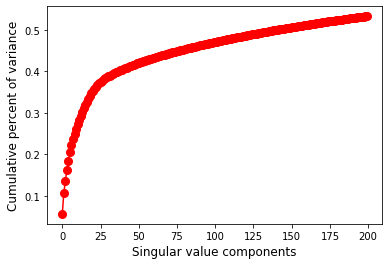

In [79]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=16, color = 'red')
plt.xlabel('Singular value components',fontsize = 12)
plt.ylabel('Cumulative percent of variance',fontsize = 12)
plt.show()
# the first 200 components explain over 50% of the variance

In [80]:
# number of latent dimensions to keep
n = 200
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index = Final.title.tolist())

In [81]:
latent_matrix.shape

(26694, 200)

In [82]:
latent_matrix

array([[ 2.68039326e-02,  5.24038368e-02,  1.94792307e-02, ...,
        -8.60472121e-02,  9.08664760e-02, -5.93148700e-02],
       [ 1.05120519e-02,  1.05369166e-02,  2.58459065e-02, ...,
         5.08596691e-02, -2.64160978e-02, -1.82197955e-02],
       [ 3.88273839e-02,  7.39484928e-02, -4.92983199e-03, ...,
         6.32122675e-03, -1.96123896e-02, -1.26603359e-02],
       ...,
       [ 6.15066536e-03,  3.92192243e-03,  1.42040443e-02, ...,
        -4.95789792e-05, -3.04223753e-03,  1.98004171e-03],
       [ 2.79960732e-05,  1.88955658e-05,  1.56684732e-04, ...,
        -3.20867824e-04,  3.98200218e-04, -5.26422386e-04],
       [ 5.65503192e-02,  4.46394794e-02,  3.34946921e-01, ...,
        -3.43814354e-03,  2.12579045e-03,  3.08545994e-03]])

In [83]:
latent_matrix[0].shape

(200,)

In [84]:
latent_matrix[0]

array([ 0.02680393,  0.05240384,  0.01947923,  0.00336053,  0.00400432,
       -0.02490728,  0.11509017,  0.01274932, -0.00162656,  0.10393871,
        0.25013496, -0.05545393, -0.07279291, -0.04401306, -0.01504909,
        0.00143629, -0.17204058, -0.19080977, -0.00698494, -0.07452739,
       -0.2079433 ,  0.04752187, -0.00676947,  0.00474375, -0.01415967,
        0.00864149,  0.06476739, -0.0374566 ,  0.00859205, -0.02805696,
       -0.04123569, -0.00398272, -0.04559195, -0.01247514, -0.00916107,
       -0.03680139, -0.00726634,  0.01842521,  0.00245068,  0.00393886,
        0.01179809, -0.01213497,  0.02866716, -0.0540706 , -0.03526189,
        0.0228444 ,  0.08509125, -0.02018567, -0.19692148, -0.03058771,
       -0.1524717 , -0.06111303,  0.10389647,  0.09430443,  0.01627539,
       -0.00477359, -0.03186166, -0.05648978,  0.06220935, -0.14557544,
        0.00853258,  0.08476547, -0.03376955,  0.07106454, -0.07636573,
        0.05132636, -0.05144322, -0.02404539, -0.00186314,  0.04

In [85]:
latent_matrix_1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.026804,0.052404,0.019479,0.003361,0.004004,-0.024907,0.115090,0.012749,-0.001627,0.103939,...,-0.069689,-0.039892,-0.095727,-0.035065,-0.036960,-0.072259,-0.079013,-0.086047,0.090866,-0.059315
Jumanji (1995),0.010512,0.010537,0.025846,0.000882,0.013254,-0.001140,0.068154,0.012675,0.006184,0.050531,...,0.027989,-0.068126,-0.036594,0.025795,0.034069,0.012183,-0.013948,0.050860,-0.026416,-0.018220
Grumpier Old Men (1995),0.038827,0.073948,-0.004930,-0.001323,0.031760,0.002476,-0.003612,-0.001630,-0.000253,0.000645,...,0.012942,-0.012425,-0.010397,-0.006337,-0.029636,0.007472,0.003689,0.006321,-0.019612,-0.012660
Waiting to Exhale (1995),0.136327,0.077169,-0.020606,-0.002103,0.101073,0.012071,-0.012106,-0.002062,-0.004896,-0.002583,...,0.045581,-0.028773,0.092839,0.066297,0.057689,0.043714,0.018710,0.071417,0.052393,0.015276
Father of the Bride Part II (1995),0.038644,0.084084,0.000456,0.000029,-0.013619,0.000075,0.013469,-0.000218,0.008462,0.013971,...,0.027964,0.008357,-0.003855,0.014625,-0.070168,-0.013548,-0.013757,-0.010242,-0.019319,-0.022475


## Running content cosine similarity

In [86]:
from sklearn.metrics.pairwise import cosine_similarity

In [87]:
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1,-1)

In [88]:
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)

In [89]:
dictDf = {'content' : score_1}
similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index)

In [90]:
similar.sort_values('content',ascending = False, inplace = True)
similar[1:].head(10)
# captures same type of movies (content)

,content
Toy Story 2 (1999),0.960608
"Bug's Life, A (1998)",0.905000
Ratatouille (2007),0.898852
"Monsters, Inc. (2001)",0.878699
Finding Nemo (2003),0.870089
Ice Age (2002),0.868740
Toy Story 3 (2010),0.861191
"Incredibles, The (2004)",0.782221
Monsters University (2013),0.771633
Antz (1998),0.738993


In [91]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [92]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [93]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [94]:
ratings_f = ratings.groupby('userId').filter(lambda x : len(x)>=55 )

In [95]:
movie_list_rating = ratings_f.movieId.unique().tolist()

In [96]:
len(ratings_f.movieId.unique())/len(movies.movieId.unique())*100

98.7990145760624

In [97]:
len(ratings_f.userId.unique())/len(ratings.userId.unique())*100

59.67213114754099

In [98]:
movies = movies[movies.movieId.isin(movie_list_rating)]

In [99]:
Mapping_file = dict(zip(movies.title.tolist(),movies.movieId.tolist()))

In [100]:
ratings_f.drop(['timestamp'], 1 ,inplace = True)

# Creating a collaborative latent matrix from user ratings

In [101]:
ratings_f.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [102]:
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on = 'movieId', how = 'right')

In [103]:
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)

In [104]:
ratings_f2.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [105]:
ratings_f2.shape

(9625, 364)

In [106]:
len(ratings_f.movieId.unique())

9625

In [107]:
from sklearn.decomposition import TruncatedSVD

In [108]:
svd = TruncatedSVD(n_components = 200) 
latent_matrix_2 = svd.fit_transform(ratings_f2)

In [109]:
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index = movies.title.tolist())

In [110]:
latent_matrix_2_df.shape

(9625, 200)

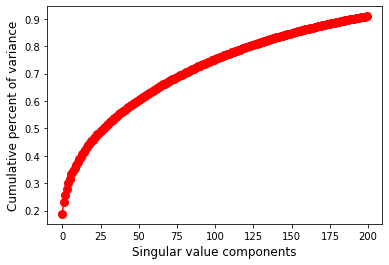

In [111]:
import matplotlib.pyplot as plt
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=16, color = 'red')
plt.xlabel('Singular value components',fontsize = 12)
plt.ylabel('Cumulative percent of variance',fontsize = 12)
plt.show()

## Running content cosine similarity

In [112]:
from sklearn.metrics.pairwise import cosine_similarity

In [113]:
a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1,-1)

In [114]:
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

In [115]:
dictDf = {'collaborative' : score_2}
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index)

In [116]:
similar.sort_values('collaborative', ascending = False, inplace = True)
similar[1:].head(10)

,collaborative
Jurassic Park (1993),0.702025
Toy Story 2 (1999),0.685334
Forrest Gump (1994),0.678163
Shrek (2001),0.672935
Star Wars: Episode IV - A New Hope (1977),0.662049
Apollo 13 (1995),0.659875
Star Wars: Episode VI - Return of the Jedi (1983),0.657047
"Shawshank Redemption, The (1994)",0.641028
Groundhog Day (1993),0.639624
Aladdin (1992),0.638689
